<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*. 

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/datos_clientes.csv")

print(df.shape)

display(df.head())

(200, 5)


,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto
0,1,Mujer,41,98115.05,39
1,2,Mujer,20,35458.14,75
2,3,Mujer,68,59872.08,55
3,4,Hombre,63,48508.93,51
4,5,Mujer,31,44431.11,54


(Utilice este espacio para describir su procedimiento)

### 2. Análisis preliminar. 

Antes de comenzar el análisis de segmentación utilice estadísticas descriptivas para explorar la variables que se encuentran en los datos. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadísticamente significativas.

Estadísticas descriptivas generales:


,count,mean,std,min,25%,50%,75%,max
Ingreso,200.0,60624.4466,26262.903416,13458.02,41512.7875,60777.96,77143.865,138584.52
Puntaje_Gasto,200.0,50.2000,25.823522,1.00,34.7500,50.00,73.000,99.00



Estadísticas por Género:


Ingreso                                                              \
         count          mean           std       min     median        max   
Genero                                                                       
Hombre      88  62126.660455  26765.492953  13458.02  61706.565  138584.52   
Mujer      112  59444.135714  25920.459216  15766.84  59355.305  126685.78   

       Puntaje_Gasto                                      
               count       mean       std min median max  
Genero                                                    
Hombre            88  48.511364  27.89677   1   50.0  97  
Mujer            112  51.526786  24.11495   5   50.0  99


Estadísticas por Grupo Etario:


Ingreso                                                   \
               count          mean           std       min     median   
Grupo_Etario                                                            
18-24             35  44454.795429  20378.208373  13458.02  46455.340   
25-34             54  71157.328148  27885.788157  19003.52  75824.910   
35-44             42  66957.096905  27722.049259  18797.16  71638.860   
45-54             39  58786.491026  24276.268114  24402.32  55041.390   
55-64             16  56357.093125  22351.828240  18434.74  54718.180   
65+               14  51420.789286  12686.437083  18437.21  51546.645   

                        Puntaje_Gasto                                       
                    max         count       mean        std min median max  
Grupo_Etario                                                                
18-24          80360.65            35  56.257143  24.659258   5   55.0  94  
25-34         138584.52            54  63.166667  24.283506   1   70.0  97  
35-44         119534.68            42  49.428571  30.700078   1   41.0  99  
45-54         126685.78            39  36.230769  16.261776   4   42.0  59  
55-64          94049.49            16  32.312500  21.752299   3   39.0  60  
65+            64156.37            14  46.714286  11.431593  14   49.0  59

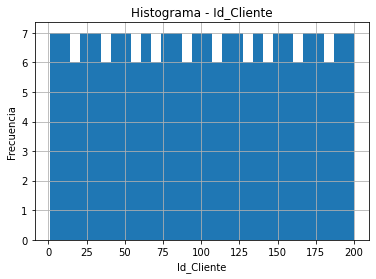

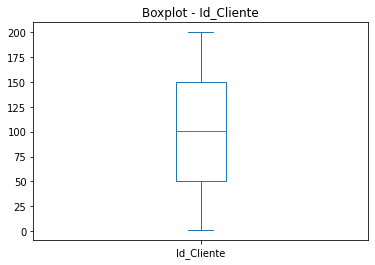

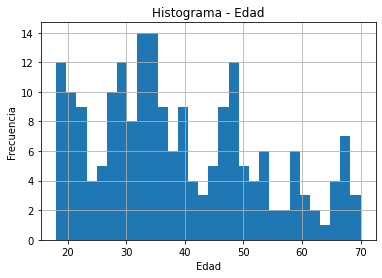

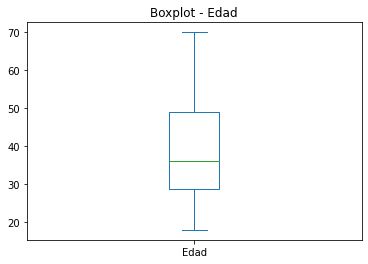

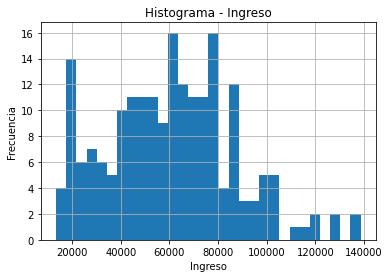

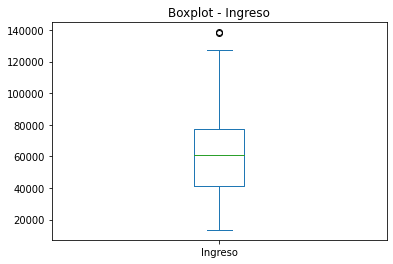

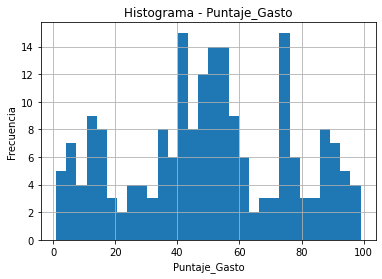

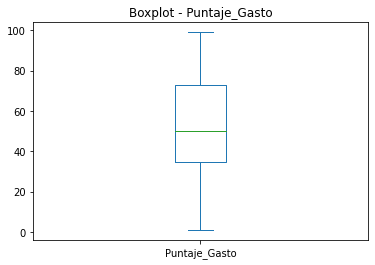

In [5]:
#duplicamos el dataset para los ejercicios de análisis preliminar
df2=df.copy()
df2["Genero"] = df2["Genero"].astype("category")
# Creamos grupos+
bins = [18, 25, 35, 45, 55, 65, np.inf]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
df2["Grupo_Etario"] = pd.cut(df2["Edad"], bins=bins, labels=labels, right=False, include_lowest=True, ordered=True)

#estadísticas descriptivas
desc_global = df2[["Ingreso", "Puntaje_Gasto"]].describe().T
print("Estadísticas descriptivas generales:")
display(desc_global)

# Por género
print("\nEstadísticas por Género:")
display(df2.groupby("Genero")[["Ingreso", "Puntaje_Gasto"]].agg(['count','mean','std','min','median','max']))

# Por grupo etario
print("\nEstadísticas por Grupo Etario:")
display(df2.groupby("Grupo_Etario")[["Ingreso", "Puntaje_Gasto"]].agg(['count','mean','std','min','median','max']))

import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]


for c in num_cols:
    plt.figure()
    df[c].hist(bins=30)
    plt.title(f"Histograma - {c}")
    plt.xlabel(c); plt.ylabel("Frecuencia")
    plt.show()

    plt.figure()
    df[c].plot(kind='box')
    plt.title(f"Boxplot - {c}")
    plt.show()

En las estadisticas descriptivas generales, se aprecia que la edad de los clientes va entre los 18 a 70 años, con una distribución de ingreso con un comportamiento que se aproxima a la campana de la distribución normal, con lo que parece algunos outliers de grandes ingresos, que se confirma en la distribución por cuartiles donde el máximo es casi el doble de los ingresos del 75% de las personas de la muestra. En términos de género, se observa que hay una distribución desigual entre hombres y mujeres, donde si bien en términos de promedio las mujeres tienen menos ingreso, tienden a tener un ingreso minimo superior, y un puntaje crediticio mejor que el de los hombres, por lo que de manera preliminar, pareciera no haber una gran diferencia. 

Controlando por rango etario, encontramos que la mayoría de las observaciones se concentran entre los 25 a 54 años. Un elemento interesante, es que entre los 18  a 44 se encuentran las personas con el mejor puntaje crediticio, lo cual podría obedecer a que durante esa epoca de la vida una persona puede estar devengando los mayores ingresos, o asumiendo menor volumen de deuda mientras consolida su patrimonio. 

In [10]:
from scipy import stats

In [12]:
#hacmeos una prueba t rapida para determinar si la diferencia en ingresos entre hombres y mujeres es significativa
if df2["Genero"].nunique() == 2:
    g1, g2 = df2["Genero"].cat.categories
    x = df2.loc[df2["Genero"] == g1, "Ingreso"]
    y = df2.loc[df2["Genero"] == g2, "Ingreso"]
    tstat, pval = stats.ttest_ind(x, y, equal_var=False)
    print(f"t-test Ingreso {g1} vs {g2}: t={tstat:.3f}, p={pval:.4g}")


t-test Ingreso Hombre vs Mujer: t=0.713, p=0.4765


La prueba t que se realiza sobre el ingreso entre hombres y mujeres pareciera no ser significativas, muy en línea con lo identificado en el inspección descriptiva inicial. 

### 3. Clustering Jerárquico

#### 3.1. Dendrogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, estandarízelas, construya y grafique un dendograma. Para la construcción del dendrograma utilice el enlace 'ward' y la distancia euclidiana. Explique la importancia de estandarizar los datos.

In [13]:
#selección y estandarización
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

X_raw = df[["Ingreso", "Puntaje_Gasto"]].copy()
scaler = StandardScaler()
X_std = scaler.fit_transform(X_raw) 


Se hizo una copia adicional del DF para el ejercicio, se estandarizó ya que tanto ingreso como puntaje tienen escalas diferentes, lo cual es clave abordar, ya que la variable con mayor escala tiende a dominar las distancias y sesgar los clusters

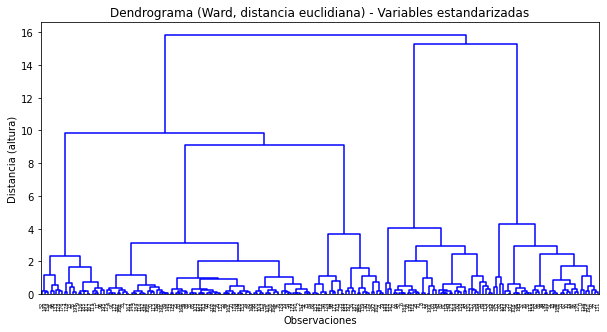

In [16]:
# construimos dendograma con ward

Z = linkage(X_std, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode=None, no_labels=False, color_threshold=0)
plt.title("Dendrograma (Ward, distancia euclidiana) - Variables estandarizadas")
plt.xlabel("Observaciones")
plt.ylabel("Distancia (altura)")
plt.show()

El dendograma sugiere que aproximadamente entre 3 o 4 clusters de clientes, por lo que a esa distancia la población de clientes podría llegarse a segmentar. 

#### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 6.

In [17]:
dist_cut = 6.0
# fcluster con criterio 'distance' asigna etiquetas al cortar el dendrograma a esa altura
labels_cut = fcluster(Z, t=dist_cut, criterion='distance')
k_found = len(np.unique(labels_cut))
print(f"Clusters retenidos {dist_cut}: K = {k_found}")

Clusters retenidos 6.0: K = 5


Fijando la distancia a 6, encontramos que los clusters retenidos deberían ser 5

#### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo, utilizando el enlace 'ward' y la distancia euclidiana. Describa los grupos encontrados, en que grupo o grupos concentraría su estrategia de marketing y por qué?

In [19]:
#aplicación del modelo jerárquico aglomerativo
model_h = AgglomerativeClustering(n_clusters=k_found, linkage='ward')
labels_h = model_h.fit_predict(X_std)

df_h = df.copy()
df_h["cluster_h"] = labels_h

print("\nDistribución de observaciones por cluster:")
display(df_h["cluster_h"].value_counts().sort_index())


Distribución de observaciones por cluster:


0    38
1    26
2    39
3    23
4    74
Name: cluster_h, dtype: int64

Con la aplicación del clustering jerárquico aglomerativo, encontramos que la base de datos no es homogenea, ya que encontramos una distribución relativamente desigual entre clusters. Esto podría obedecer a la existencia de perfiles diferenciados, tanto en ingreso y su comportamiento de gasto, lo cual cobra sentido si lo revisamos inicialmente a la luz de las estadísticas descriptivas. 

Para determinar los segmentos en los cuales concentraría la estrategia, voy a calcular la tabla de datos de los clusters, a fin de determinar que grupos presentan la categoría más interesante para realizar la estrategia de marketing

In [21]:
perfil_clusters = (
    df_h.groupby("cluster_h")[["Ingreso", "Puntaje_Gasto"]]
        .agg(
            count=("Ingreso", "size"),
            ingreso_prom=("Ingreso", "mean"),
            gasto_prom=("Puntaje_Gasto", "mean"),
            ingreso_min=("Ingreso", "min"),
            ingreso_max=("Ingreso", "max"),
            gasto_min=("Puntaje_Gasto", "min"),
            gasto_max=("Puntaje_Gasto", "max")
        )
        .round(2)
)

# Ordenamos
perfil_clusters_sorted = perfil_clusters.sort_values(by=["ingreso_prom","gasto_prom"], ascending=False)
print("\nClusters ordenados por ingreso y gasto promedio:")
display(perfil_clusters_sorted)



Clusters ordenados por ingreso y gasto promedio:


,count,ingreso_prom,gasto_prom,ingreso_min,ingreso_max,gasto_min,gasto_max
cluster_h,,,,,,,
0,38,87055.07,18.63,70888.72,138584.52,1,40
2,39,86537.50,82.13,68486.79,137838.57,63,97
4,74,55451.26,50.22,40218.68,70469.66,40,60
1,26,28274.67,23.31,13458.02,43155.28,3,42
3,23,26230.42,78.57,15766.84,38950.66,61,99


Encontramos que los clusters 0 y 2 tienen el mayor potencial para ser el grupo para la estrategia de marketing. Claramente el grupo 2 es el que más potencial tiene, ya que es un segmento de altos ingresos y altos gastos, y el 0 es donde hay un potencial, ya que sus ingresos son altos, pero su proporción de gasto no está a la par. 

### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Al implementar  justifique su elección de `min_samples` y `eps`. ¿Cuántos grupos o clusters encuentra? ¿Cuáles son su características? ¿Cambiaría su estrategia de marketing respecto al punto anterior? Justifique su respuesta.

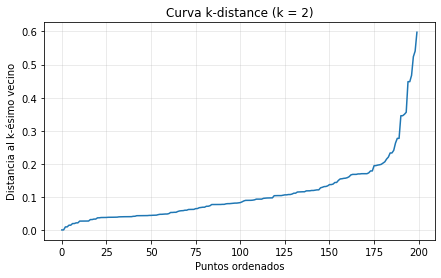

In [25]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

#como lo señala el laboratorio de prueba, no existe un método unificado para la elección de min_samples, y esto depende
#principalmente del conocimiento de quien implementa el algoritmo. Ahora bien, siguiendo la sugerencia de Ester et al. (1996),
# al ser un matriz con dos dimensiones, se escogerá el min_samples=2

min_samples=2

nbrs = NearestNeighbors(n_neighbors=min_samples)
nbrs.fit(X_std)
distances, indices = nbrs.kneighbors(X_std)

# Distancia al k-ésimo vecino
k_dist = np.sort(distances[:, -1])

plt.figure(figsize=(7,4))
plt.plot(k_dist)
plt.title(f"Curva k-distance (k = {min_samples})")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al k-ésimo vecino")
plt.grid(True, alpha=0.3)
plt.show()

Para la estimación del parámetro eps, se utilizó la curva k-distance, calculando la distancia al 2º vecino. La gráfica mostró un crecimiento suave hasta aproximadamente 0.20–0.25, a partir de donde la pendiente se incrementa con mayor rapidez, señalando el punto de máxima curvatura. Por ello, se seleccionará un valor de eps cercano a 0.22, que permite balancear la detección de clusters sin que la mayoría de los puntos se clasifiquen como ruido ni que todos se unan en un único grupo. Ahora si procedemos a realizar el DBSCAN con los parametros identificados

In [28]:
eps=0.22

db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X_std)

# Añadimos resultados al dataframe original
df_db = df.copy()
df_db["cluster_db"] = labels

In [30]:
# Número de clusters y ruido
cluster_ids = [c for c in np.unique(labels) if c != -1]
n_clusters = len(cluster_ids)

print(f"Número de clusters detectados (excluyendo ruido): {n_clusters}")

print("Distribución de observaciones por cluster:")
display(df_db["cluster_db"].value_counts().sort_index())



Número de clusters detectados (excluyendo ruido): 19
Distribución de observaciones por cluster:


-1     17
 0     11
 1     79
 2     21
 3      2
 4     22
 5      7
 6      2
 7      6
 8      2
 9      6
 10     2
 11     3
 12     2
 13     3
 14     3
 15     3
 16     5
 17     2
 18     2
Name: cluster_db, dtype: int64

Con los parametros definidos, el alogritmo encontró 19 clusters, que tienen la distribución que se señala en la tabulación. En principio, pareciera que solo son realmente clusters los 0,1,2 y 4.


Perfil de clusters (medias/min/max en escala original):


,count,ingreso_prom,gasto_prom,ingreso_min,ingreso_max,gasto_min,gasto_max
cluster_db,,,,,,,
0,11,22761.15,75.36,15766.84,35458.14,72,81
1,79,54485.16,50.22,38599.28,70469.66,40,65
2,21,74763.38,82.76,68486.79,80495.35,71,97
3,2,103001.44,68.50,102348.09,103654.79,68,69
4,22,81606.50,11.73,71651.08,101102.93,1,22
5,7,22674.71,34.43,13458.02,29740.62,29,40
6,2,97258.31,87.00,96478.70,98037.92,86,88
7,6,74504.70,34.83,70888.72,80565.01,29,40
8,2,39320.06,27.00,38392.92,40247.19,26,28


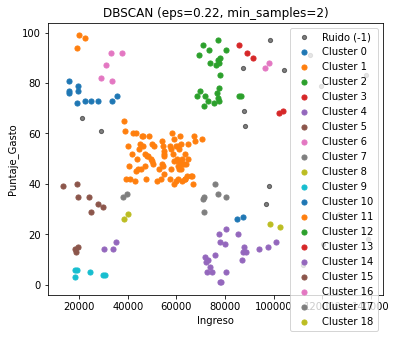

In [32]:
#caracterización clusters
if n_clusters > 0:
    perfil = (
        df_db[df_db["cluster_db"] != -1]
        .groupby("cluster_db")[["Ingreso","Puntaje_Gasto"]]
        .agg(count=("Ingreso","size"),
             ingreso_prom=("Ingreso","mean"),
             gasto_prom=("Puntaje_Gasto","mean"),
             ingreso_min=("Ingreso","min"),
             ingreso_max=("Ingreso","max"),
             gasto_min=("Puntaje_Gasto","min"),
             gasto_max=("Puntaje_Gasto","max"))
        .round(2)
    )
    print("\nPerfil de clusters (medias/min/max en escala original):")
    display(perfil)

#Visualización

plt.figure(figsize=(6,5))
mask_noise = (labels == -1)
plt.scatter(df_db.loc[mask_noise, "Ingreso"],
            df_db.loc[mask_noise, "Puntaje_Gasto"],
            s=18, alpha=0.5, label="Ruido (-1)", c="black")

for cl in cluster_ids:
    m = (labels == cl)
    plt.scatter(df_db.loc[m, "Ingreso"],
                df_db.loc[m, "Puntaje_Gasto"],
                s=26, label=f"Cluster {cl}")

plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})")
plt.xlabel("Ingreso")
plt.ylabel("Puntaje_Gasto")
plt.legend()
plt.show()

Aplicando DBSCAN se identificaron 19 distintos clusters, con un volumen heterogeneo de observaciones dentro de ellos. A pesar de esto, se puede observar que hay algunos grupos, especialmente el 2 y 5 que podrían ser el segmento premium y el foco de la estrategia de marketing. En términos prácticos, el foco de la estrategia sigue siendo la misma, donde se debería priorizar clusters donde se ubiquen personas con alto ingreso y alta disposición a gastar, sin embargo, el DBSCAN da un mayor volumen de grupos, lo cual podría lelgar a dificultar la aplicación de una estrategia. 

### 5. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Usando las categorías de edad creadas anteriormente incorpore género y grupo etario a su análisis. Genere los grupos utilizando DBSCAN y la distancia de Gower, justificando su elección de `min_samples` y `eps`   ¿Incorporar estas variables, ayuda a la focalización de la estrategia de marketing?

In [7]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir su procedimiento)